In [1]:
import cv2 #opencv
import matplotlib.pyplot as plt
import time

In [2]:
path = 'C:/Users/Aizat/Desktop/SEM 1 22-23/MACHINE VISION/Workshop Event/Faces'
labels = ['Shock','Happy','Tired']

In [18]:
for label in labels:
    print('Taking a picture for {}'.format(label))
    time.sleep(2)
    cap = cv2.VideoCapture(0)
    
    ret, frame = cap.read();
    
    imagename = path+'/'+label+'.jpg'   
    cv2.imwrite(imagename, frame)
    
    cv2.imshow('frame',frame)
    cv2.waitKey(3000)
    cv2.destroyWindow('frame')
    
print("Done Taking Photos!")

Taking a picture for Shock
Taking a picture for Happy
Taking a picture for Tired
Done Taking Photos!


In [48]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

Shock
Happy
Tired


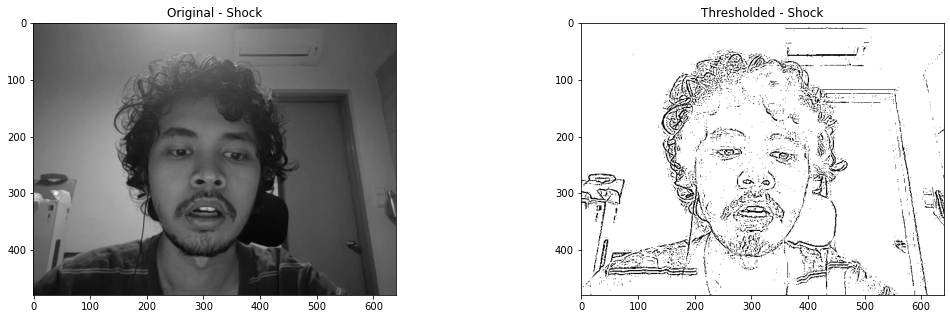

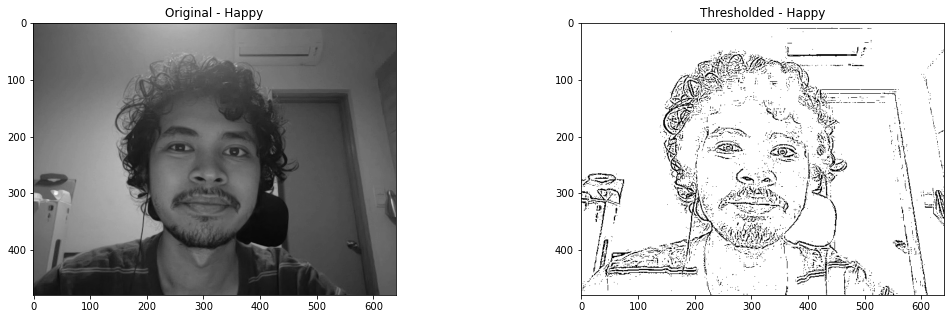

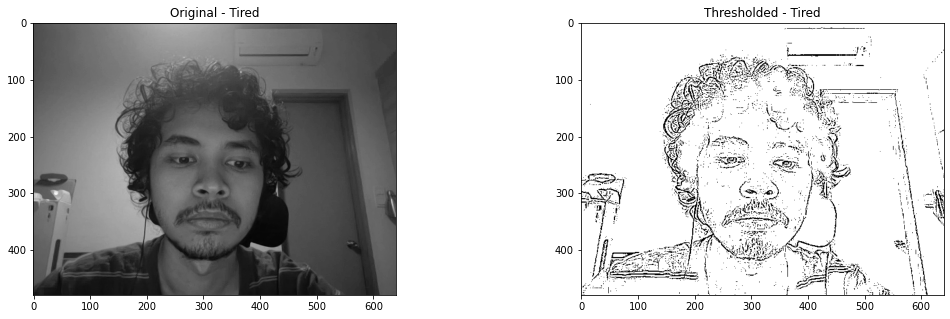

In [59]:
for label in labels:
    image = cv2.imread(path+'/'+label+'.jpg');
    
    faces = face_cascade.detectMultiScale(image, 1.1, 4)
    
    grayscale = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    


    grayImage = cv2.adaptiveThreshold(grayscale, 220, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 3)
    

    
    plt.figure(figsize=[18,5])
    print(label)
    
    
    
    plt.subplot(121); plt.imshow(grayscale, cmap="gray");         plt.title("Original - " + label);
    plt.subplot(122); plt.imshow(grayImage, cmap="gray");         plt.title("Thresholded - " + label);
    cv2.waitKey(500);
    
    

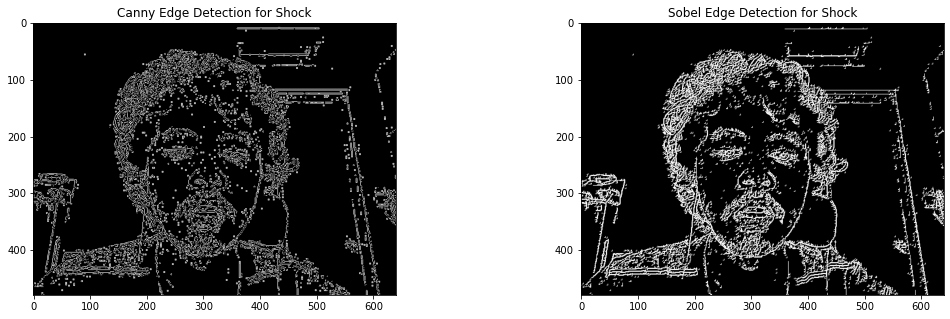

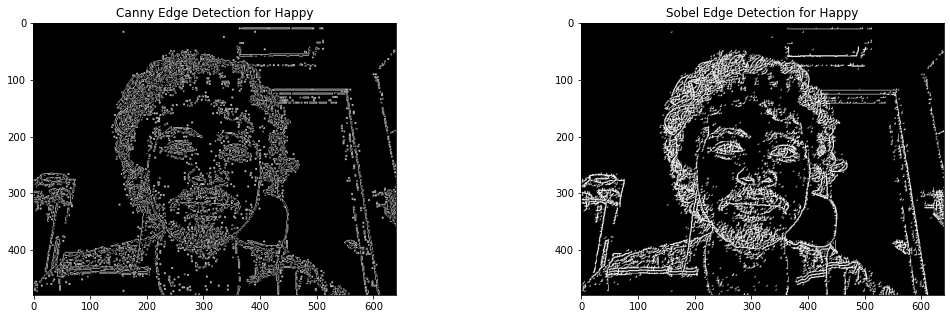

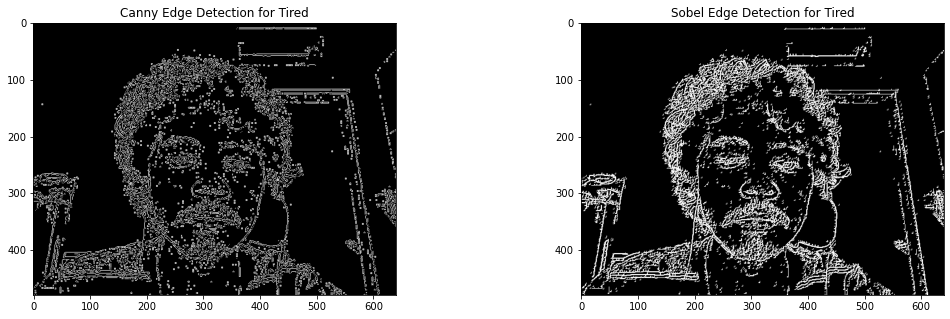

In [23]:
for label in labels:
    image = cv2.imread(path+'/'+label+'.jpg');
    grayscale = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    grayImage = cv2.adaptiveThreshold(grayscale, 220, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 3)
    
    
    imgCanny = cv2.Canny(grayImage,10,70)
    
    sobelx = cv2.Sobel(grayImage, cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(grayImage, cv2.CV_8U,0,1,ksize=3)
    imgSobel = sobelx + sobely
    
    plt.figure(figsize=[18,5])
    plt.subplot(121); plt.imshow(imgCanny, cmap="gray");         plt.title('Canny Edge Detection for {}'.format(label));
    plt.subplot(122); plt.imshow(imgSobel, cmap="gray");         plt.title('Sobel Edge Detection for {}'.format(label));
    
    edgePath = path+'/'+label+'Gray'+'.jpg'  
    cv2.imwrite(edgePath, grayscale)
    
    edgePath = path+'/'+label+'Canny'+'.jpg'  
    cv2.imwrite(edgePath, imgCanny)
    
    edgePath = path+'/'+label+'Sobel'+'.jpg'  
    cv2.imwrite(edgePath, imgSobel)
    
    
    

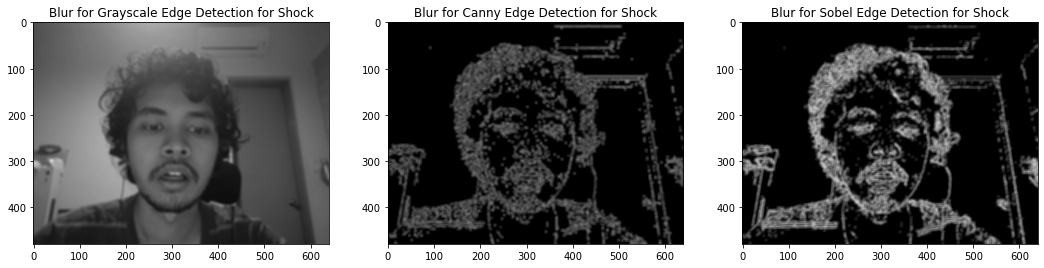

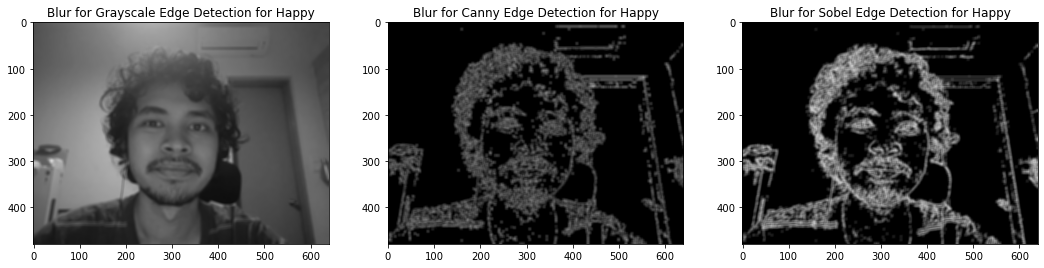

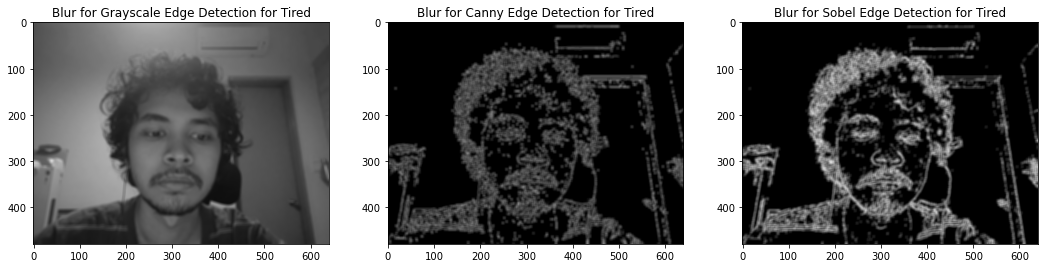

In [22]:
for label in labels:    
    
    edgePath = path+'/'+label+'Gray'+'.jpg'  
    blur1 = cv2.imread(edgePath)
    blur1 = cv2.GaussianBlur(blur1,(7,7),255)
    
    edgePath = path+'/'+label+'Canny'+'.jpg'  
    blur2 = cv2.imread(edgePath)
    blur2 = cv2.GaussianBlur(blur2,(7,7),5)
    
    edgePath = path+'/'+label+'Sobel'+'.jpg'  
    blur3 = cv2.imread(edgePath)
    blur3 = cv2.GaussianBlur(blur3,(7,7),5)
    
    
    
    
    plt.figure(figsize=[18,5])    
    plt.subplot(131); plt.imshow(blur1, cmap="gray");         plt.title('Blur for Grayscale Edge Detection for {}'.format(label));
    plt.subplot(132); plt.imshow(blur2, cmap="gray");         plt.title('Blur for Canny Edge Detection for {}'.format(label));
    plt.subplot(133); plt.imshow(blur3, cmap="gray");         plt.title('Blur for Sobel Edge Detection for {}'.format(label));
    

In [61]:
#Part C
import os
import cv2 #opencv
import matplotlib.pyplot as plt
import numpy as np


PXL1.jpg
In this picture there are 7 Coints
PXL2.jpg
In this picture there are 4 Coints
PXL3.jpg
In this picture there are 3 Coints
PXL4.jpg
In this picture there are 5 Coints


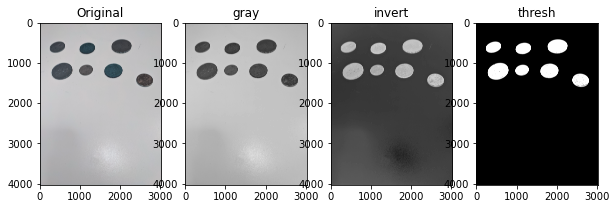

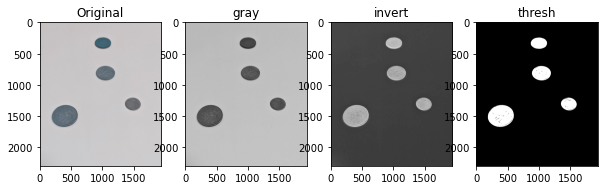

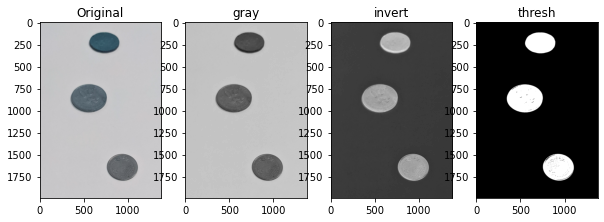

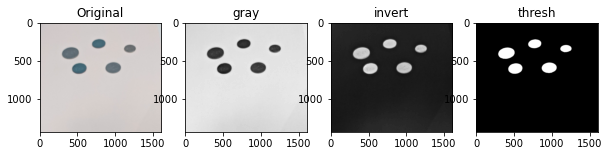

In [62]:

coinpath = 'C:/Users/Aizat/Desktop/SEM 1 22-23/MACHINE VISION/Workshop Event/Coins'

for images in os.listdir(coinpath):
    if (images.endswith(".jpg")):
        print(images)
        coin = cv2.imread(coinpath +'/'+images);
        coin_gray = cv2.cvtColor(coin, cv2.COLOR_BGR2GRAY)
        invert_coin = cv2.bitwise_not(coin_gray)
        ret, thresh = cv2.threshold(invert_coin, 120, 255, cv2.THRESH_BINARY)

        
        
        plt.figure(figsize=[10,10])
        plt.subplot(141); plt.imshow(coin, cmap="gray");              plt.title("Original");
        plt.subplot(142); plt.imshow(coin_gray, cmap="gray");         plt.title("gray");
        plt.subplot(143); plt.imshow(invert_coin, cmap="gray");         plt.title("invert");
        plt.subplot(144); plt.imshow(thresh, cmap="gray");         plt.title("thresh");
        

        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        print("In this picture there are " + str(len(contours)) + " Coints")
        
        